In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

In [23]:
# 従来方法の収束速度の読み込み
eval_list = ["eval5", "eval7", "eval12"]
model_list = ["v" + str(i) for i in range(1, 21)]
conv_train_err_speeds = []
conv_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../conventional/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    conv_train_err_speeds.append(train_err_speeds)
    conv_test_err_speeds.append(test_err_speeds)

In [24]:
# 提案方法の収束速度の読み込み
# ["eval41", "eval42", "eval43", "eval44", "eval45"]
eval_list = ["eval41","eval44", "eval45"]
model_list = ["v" + str(i) for i in range(1, 21)]
prop_train_err_speeds = []
prop_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    prop_train_err_speeds.append(train_err_speeds)
    prop_test_err_speeds.append(test_err_speeds)

In [27]:
from collections import defaultdict

points = [4,8,15]
conv_train_sample_clusters = defaultdict(list)
prop_train_sample_clusters = defaultdict(list)
conv_test_sample_clusters = defaultdict(list)
prop_test_sample_clusters = defaultdict(list)

for i, point in enumerate(points):
    start = 0 if i == 0 else points[i-1]
    end = points[i]
    for index in range(3):
        conv_train_sample_clusters[i] += conv_train_err_speeds[index][start:end]
        prop_train_sample_clusters[i] += prop_train_err_speeds[index][start:end]
        conv_test_sample_clusters[i] += conv_test_err_speeds[index][start:end]
        prop_test_sample_clusters[i] += prop_test_err_speeds[index][start:end]

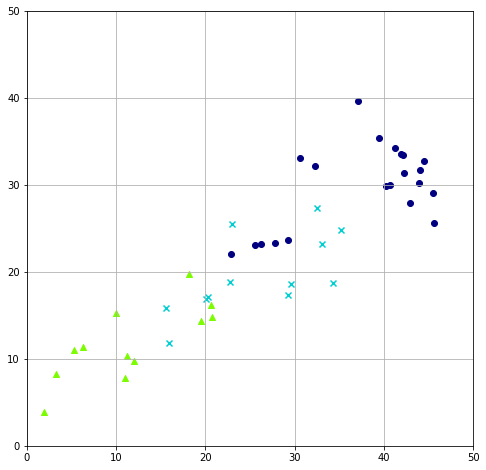

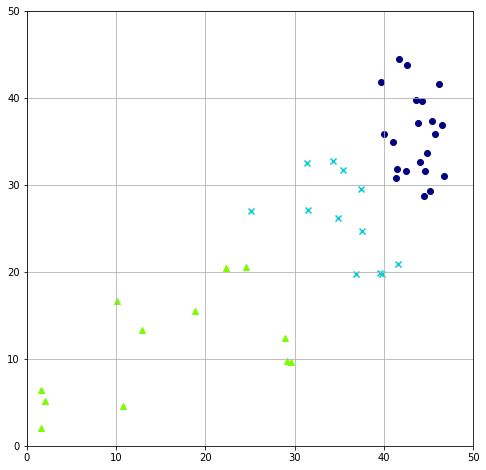

In [28]:
fig1 = plt.figure(figsize=(8,8))
plt.scatter(conv_train_sample_clusters[0], conv_test_sample_clusters[0], c="lawngreen", marker="^")
plt.scatter(conv_train_sample_clusters[1], conv_test_sample_clusters[1], c="darkturquoise", marker="x")
plt.scatter(conv_train_sample_clusters[2], conv_test_sample_clusters[2], c="navy")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.grid(True)

fig2 = plt.figure(figsize=(8,8))
plt.scatter(prop_train_sample_clusters[0], prop_test_sample_clusters[0], c="lawngreen", marker="^")
plt.scatter(prop_train_sample_clusters[1], prop_test_sample_clusters[1], c="darkturquoise", marker="x")
plt.scatter(prop_train_sample_clusters[2], prop_test_sample_clusters[2], c="navy")
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.grid(True)